### Customer Purchase behaviour 


**Data Overview**
The dataset contains smartphone attributes including product names, actual and discount prices, star ratings, review counts, storage capacities, display sizes, camera specifications, RAM, and brands.

**Problem Statement**
This analysis aims to understand customer purchase behavior by exploring:

* Price Sensitivity: How do actual and discounted prices influence ratings and reviews?
* Quality Perception: Is there a correlation between star ratings and product specifications?
* Brand Loyalty: How do brands compare in ratings and consumer preference?
* Feature Preferences: Which features impact customer satisfaction the most?
  
Insights from this analysis can guide businesses in optimizing marketing strategies, pricing, and product features to better meet customer needs.

In [1]:
# Import required Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv("Mobiles_Dataset.csv")

In [3]:
# Top 5 Rows
df.head(5)

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...


**Before we analyze the data, let’s clean it and extract relevant columns to gain insights into customer purchase behavior**

* Treating the column RAM (GB)

In [4]:
# NIL values count in RAM (GB) Column 
df[df['RAM (GB)']=='NIL'].shape[0]

161

In [5]:
# Extracting the RAM from Description Column to fill the NIL Value
df['RAM'] = df['Description'].str.split().str[0]

In [6]:
# Checking the value counts 
df['RAM'].value_counts()

RAM
8             384
4             200
12            125
6             116
32             65
128            27
16             14
3              13
0               7
256             7
2               6
64              5
512             4
24              3
Expandable      2
48              2
0.046875        2
500             1
20              1
Name: count, dtype: int64

In [7]:
# Cleaning the Column RAM
invalid_RAM = ['0','Expandable','0.046875']
df.drop(df[df['RAM'].isin(invalid_RAM)].index,inplace=True)

* Treating Actual Price Column 

In [8]:
# NIL values count in RAM (GB) Column
df[df['Actual price']=='NIL'].shape[0]

54

In [9]:
# Droping the rows 
df.drop(df[df['Actual price']=='NIL'].index,inplace=True)

### Null Values Treatment

In [10]:
# NIL values count in Storage (GB) Column
df[df['Storage (GB)']=='NIL'].shape[0]

96

In [11]:
df['Storage (GB)'].value_counts()

Storage (GB)
128    422
256    261
NIL     96
64      77
512     42
32      15
16       2
5        2
4        1
3        1
Name: count, dtype: int64

In [12]:
# Drop rows with 'NIL' in 'Storage (GB)' column
df.drop(df[df['Storage (GB)'] == 'NIL'].index, inplace=True)

In [13]:
# Checking for Null values
df.isnull().sum()

Product Name            0
Actual price            0
Discount price          0
Stars                   0
Rating                  0
Reviews                 0
RAM (GB)                0
Storage (GB)            0
Display Size (inch)     0
Camera                 47
Description             0
Link                    0
RAM                     0
dtype: int64

In [14]:
df.dropna(inplace=True)

* Extracting Brand Name from Product Name

In [15]:
df['Brand'] = df['Product Name'].str.split().str[0]

In [16]:
df['Rating'] = df["Rating"].str.split().str[0]
df['Reviews'] = df["Reviews"].str.split().str[0]

In [17]:
# Droping Columns 
df.drop(columns=['RAM (GB)','Link','Description'],inplace=True)

In [18]:
df.head(5)

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,Storage (GB),Display Size (inch),Camera,RAM,Brand
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793","2,402",128,6.10,48MP + 12MP,128,Apple
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793","2,402",128,6.10,48MP + 12MP,128,Apple
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793","2,402",128,6.10,48MP + 12MP,128,Apple
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005",41,128,6.56,50MP,4,OnePlus
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005",41,64,6.56,50MP,4,OnePlus


In [19]:
df.shape

(776, 11)

In [20]:
# Checking the datatype of few columns
df['Reviews'] = pd.to_numeric(df['Reviews'].str.replace(',', ''), errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'].str.replace(',',''),errors='coerce')

In [21]:
df['Actual price'] = df['Actual price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['Discount price'] = df['Discount price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

In [22]:
df[['RAM','Storage (GB)','Actual price','Discount price']] = df[['RAM','Storage (GB)','Actual price','Discount price']].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 970
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         776 non-null    object 
 1   Actual price         776 non-null    int32  
 2   Discount price       776 non-null    int32  
 3   Stars                776 non-null    float64
 4   Rating               776 non-null    int64  
 5   Reviews              776 non-null    int64  
 6   Storage (GB)         776 non-null    int32  
 7   Display Size (inch)  776 non-null    float64
 8   Camera               776 non-null    object 
 9   RAM                  776 non-null    int32  
 10  Brand                776 non-null    object 
dtypes: float64(2), int32(4), int64(2), object(3)
memory usage: 60.6+ KB


In [24]:
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,Storage (GB),Display Size (inch),Camera,RAM,Brand
0,"Apple iPhone 15 (Green, 128 GB)",79600,65999,4.6,44793,2402,128,6.10,48MP + 12MP,128,Apple
1,"Apple iPhone 15 (Blue, 128 GB)",79600,65999,4.6,44793,2402,128,6.10,48MP + 12MP,128,Apple
2,"Apple iPhone 15 (Black, 128 GB)",79600,65999,4.6,44793,2402,128,6.10,48MP + 12MP,128,Apple
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999,11489,4.0,1005,41,128,6.56,50MP,4,OnePlus
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999,12999,4.0,1005,41,64,6.56,50MP,4,OnePlus


### Data Analysis 

**Count of Products By Brand**

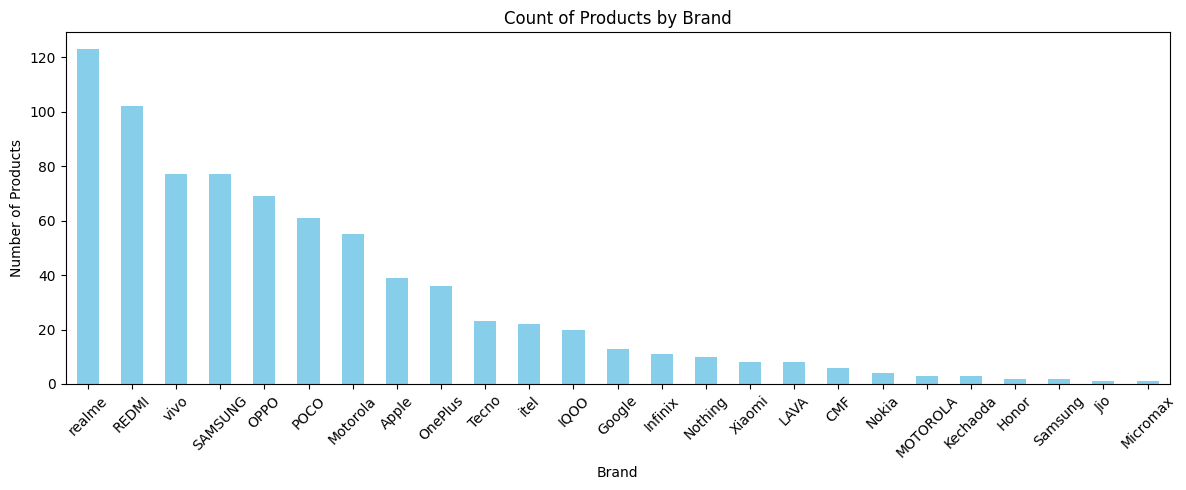

In [25]:
Count_of_product_by_Brand = df.groupby('Brand')['Product Name'].count().sort_values(ascending=False)

plt.figure(figsize=(12,5))
Count_of_product_by_Brand.plot(kind='bar',color='skyblue')
plt.title('Count of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

* **Insight** : The analysis reveals that the quantity of Realme phones exceeds that of other brands, indicating a strong consumer preference and effective marketing strategies driving their popularity.

**Which Brand has the highest Average Ratings and Reviews**

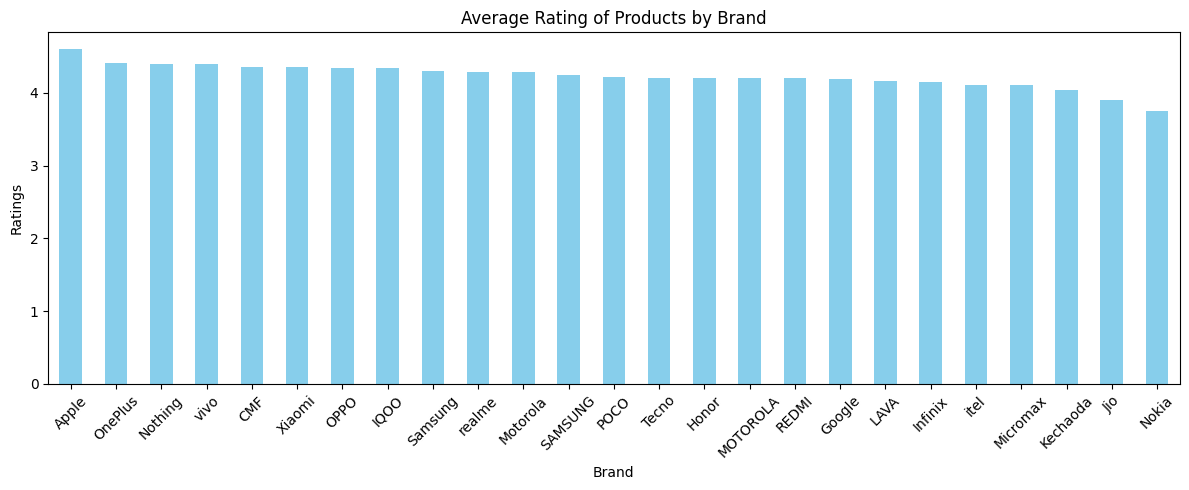

In [26]:
# Ratings 
Avg_Ratings = df.groupby('Brand')['Stars'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
Avg_Ratings.plot(kind='bar',color='skyblue')
plt.title('Average Rating of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

* **Insight** : The analysis shows that Realme phones outnumber those of any other brand, highlighting strong consumer preference and effective marketing strategies. However, average ratings are higher for Apple, followed by OnePlus, indicating that these brands excel in perceived quality and customer satisfaction.

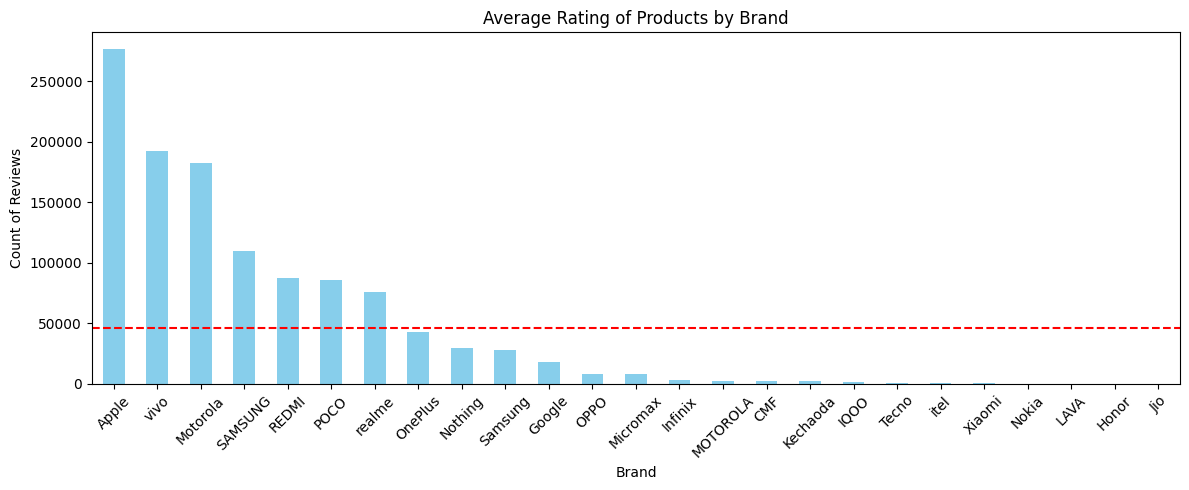

In [27]:
# Reviews 
Count_of_reviews = df.groupby('Brand')['Reviews'].sum().sort_values(ascending=False)
Avg_Reviews = Count_of_reviews.mean()

plt.figure(figsize=(12,5))
Count_of_reviews.plot(kind='bar',color='skyblue')
plt.axhline(Avg_Reviews, color='red', linestyle='--', label='Average Reviews')
plt.title('Average Rating of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

* **Insight** : The graph of Count of Reviews vs. Brand indicates that brands like Apple, Vivo, Motorola, Samsung, Redmi, Poco, and Realme have ratings that exceed the average, whereas other brands show ratings below this average.

**Analyzing Customer Ratings Behavior Based on Storage Size**

<Figure size 1000x600 with 0 Axes>

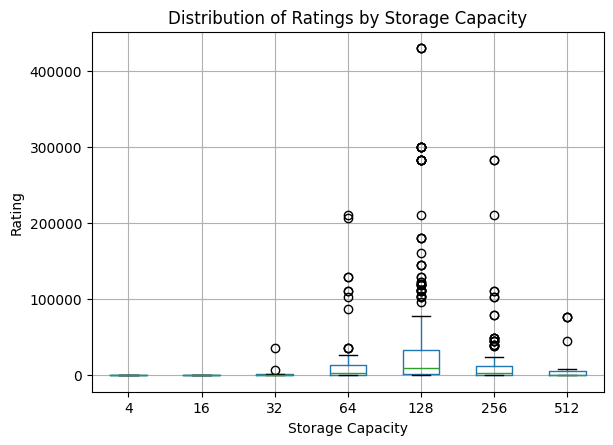

In [28]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Rating', by='Storage (GB)', grid=True)
plt.title('Distribution of Ratings by Storage Capacity')
plt.suptitle('')
plt.xlabel('Storage Capacity')
plt.ylabel('Rating')
plt.show()

**Insight**: The 128 GB variant smartphones have received higher ratings compared to all other storage options, indicating a strong preference among customers for this storage capacity.

**Analysis of Discount Prices and Customer Review Behavior**

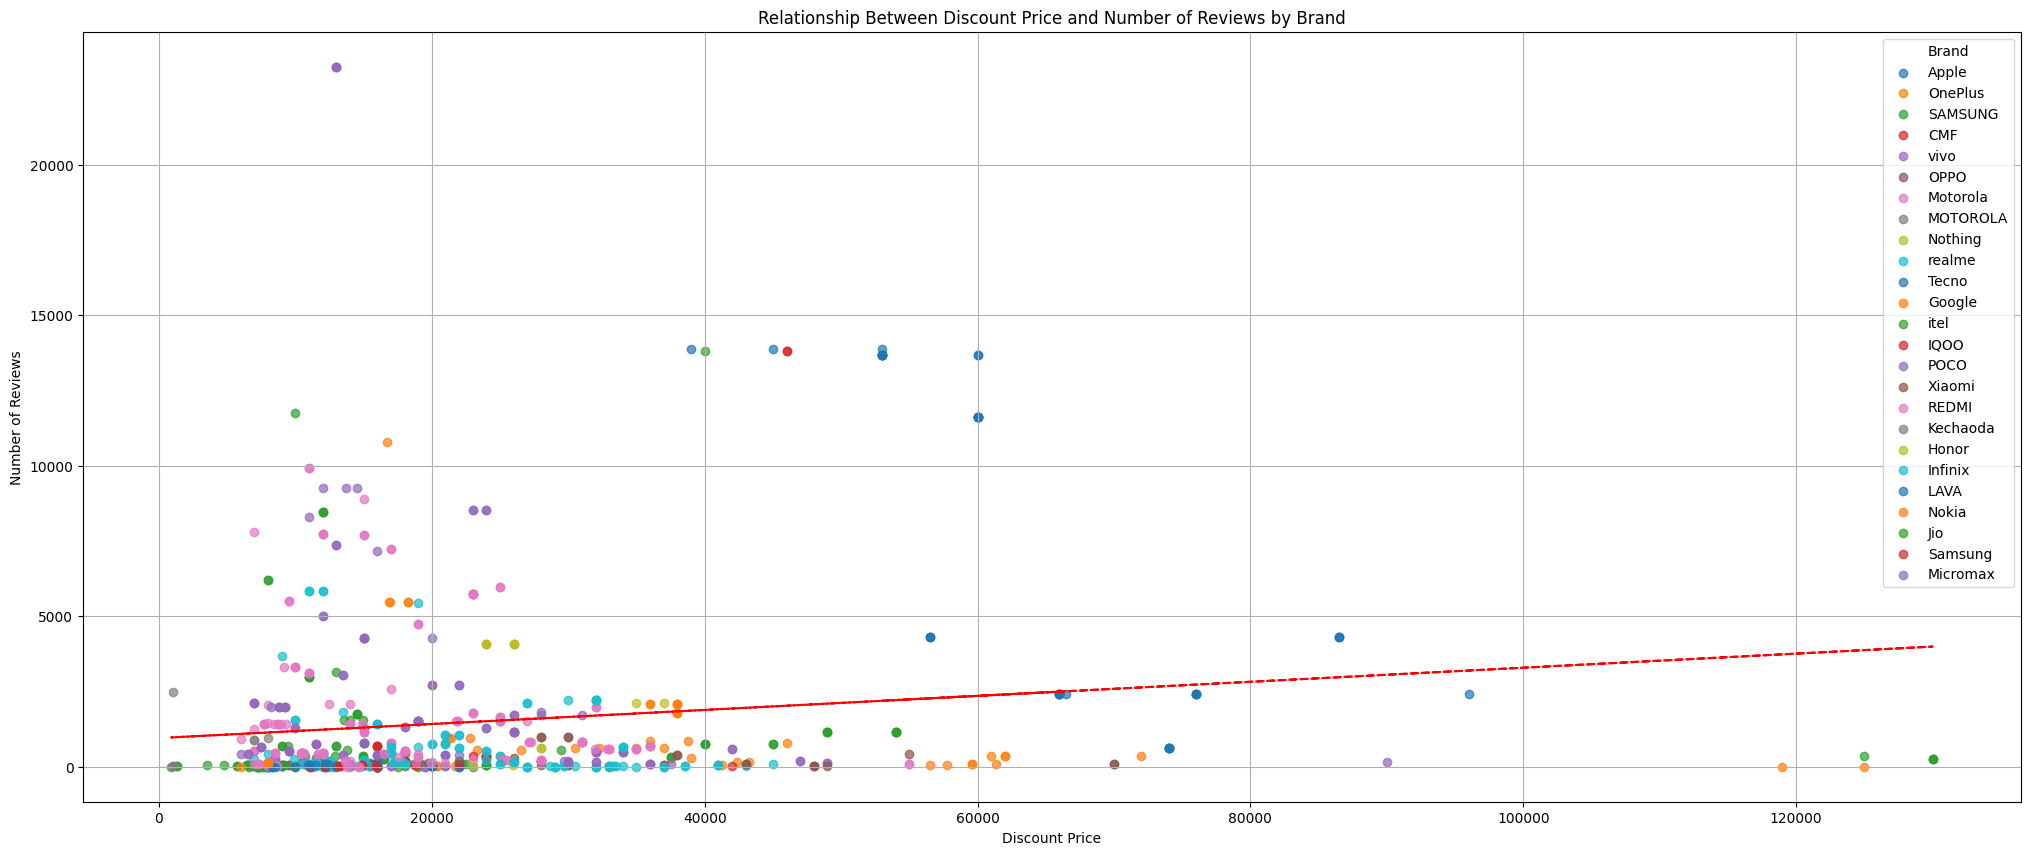

In [29]:
plt.figure(figsize=(25, 10))
for brand in df['Brand'].unique():
    subset = df[df['Brand'] == brand]
    plt.scatter(subset['Discount price'], subset['Reviews'], label=brand, alpha=0.7)

# Adding trend line
z = np.polyfit(df['Discount price'], df['Reviews'], 1)
p = np.poly1d(z)
plt.plot(df['Discount price'], p(df['Discount price']), color='red', linestyle='--')

# Adding titles and labels
plt.title('Relationship Between Discount Price and Number of Reviews by Brand')
plt.xlabel('Discount Price')
plt.ylabel('Number of Reviews')

# Adding legend
plt.legend(title='Brand')

# Show the plot
plt.grid()
plt.show()

**Insight**: The scatter plot reveals a weak positive correlation between discount prices and the number of reviews, indicating that while higher discounts may slightly encourage more reviews, the relationship is modest. Most products tend to receive fewer reviews overall, suggesting other factors may significantly influence customer feedback.

**Impact of Display Size on Customer Ratings**

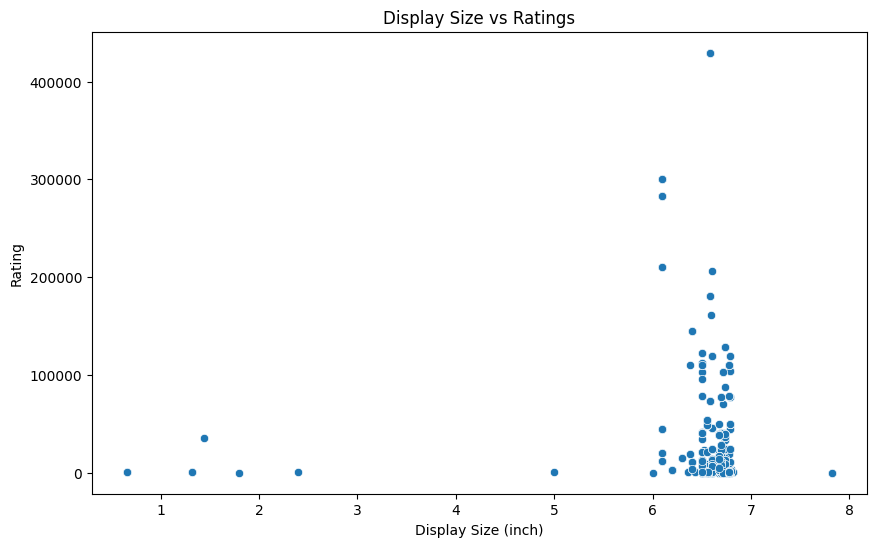

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Display Size (inch)',y='Rating')
plt.title("Display Size vs Ratings")
plt.show()

**Insight**: The graph indicates that smartphones with larger displays ranging between 6 inch to 7 inch have generally receive higher ratings and are preferred over those with smaller display sizes.

**Relation between Camera Specifications and Customer Ratings**

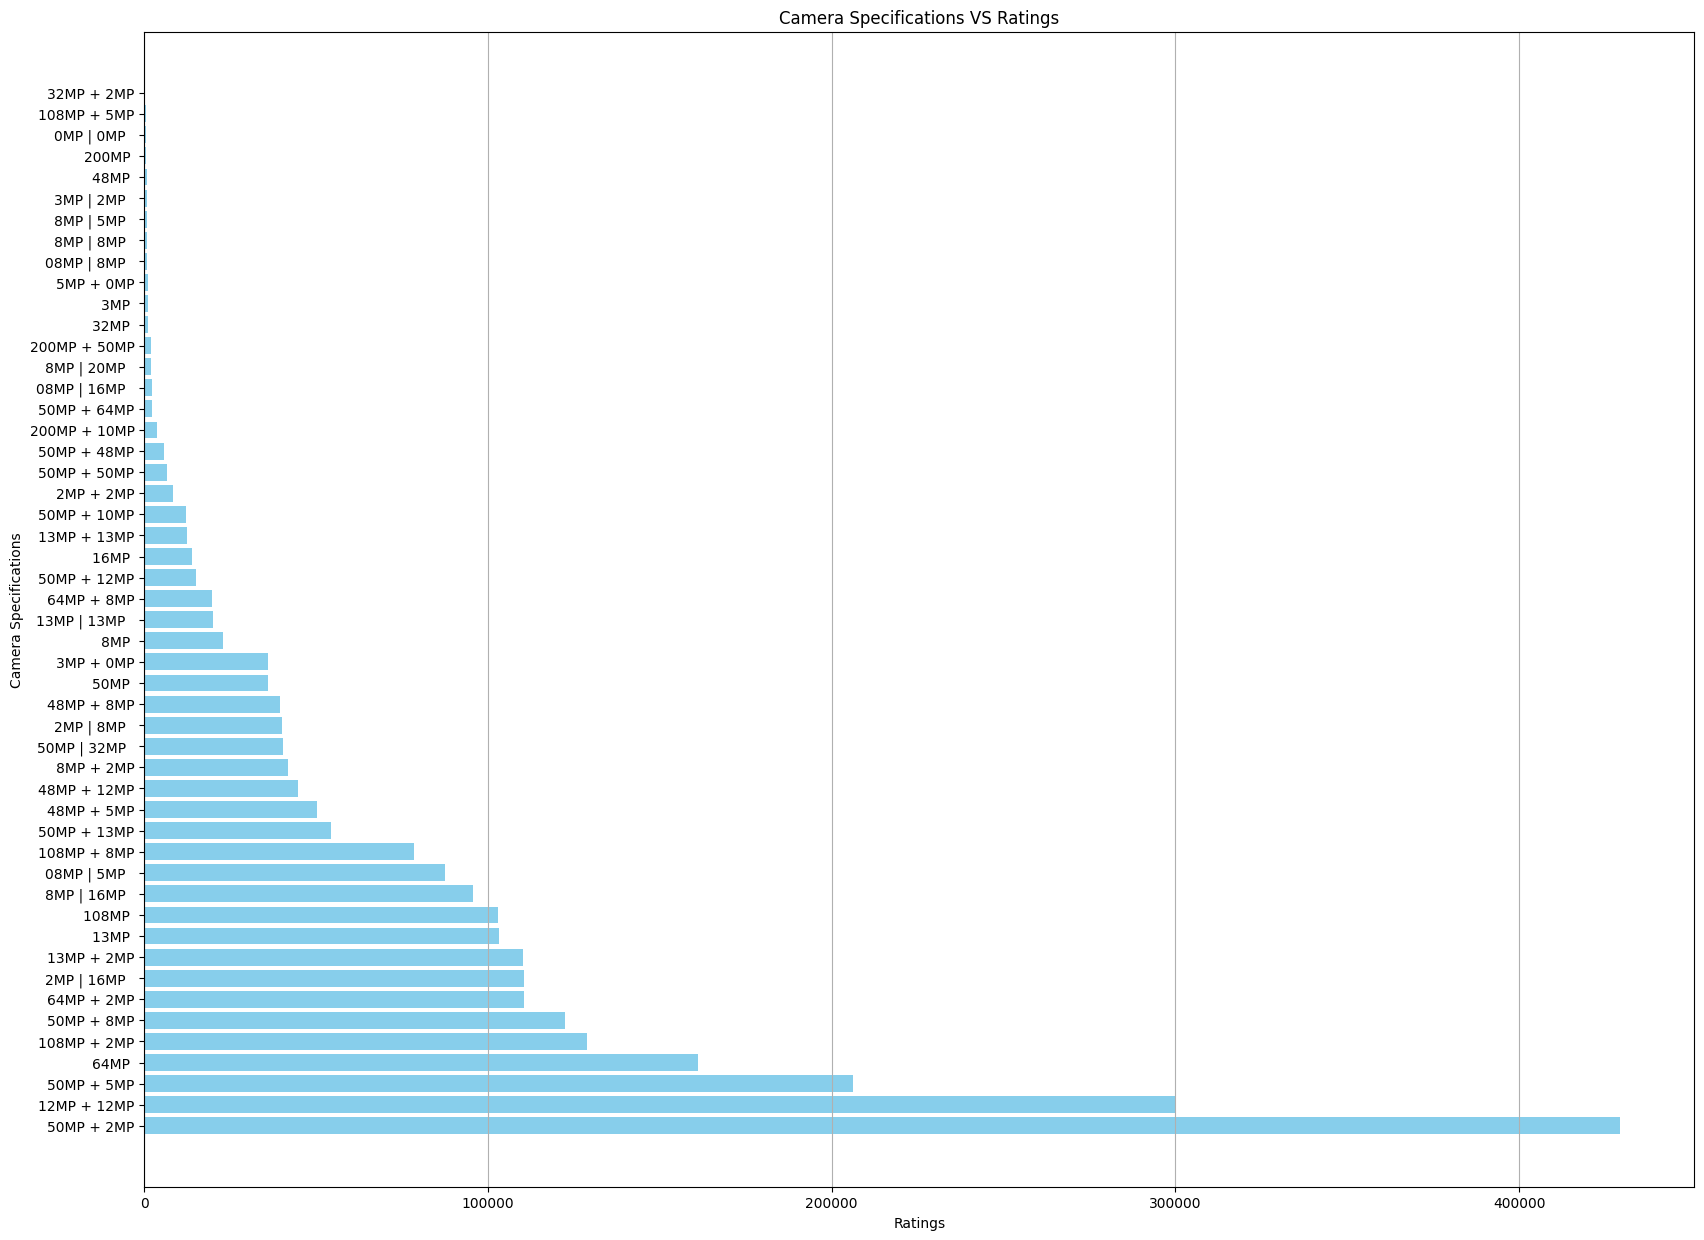

In [31]:
df_ = df.sort_values(by='Rating', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(20, 15))
plt.barh(df_['Camera'], df_['Rating'], color='skyblue')
plt.title('Camera Specifications VS Ratings')
plt.xlabel('Ratings')
plt.ylabel('Camera Specifications')

# Show the plot
plt.grid(axis='x')
plt.show()

**Insight**: 50MP+2MP shows more Rating count than any other camera Specification, which indicates that customer perfer to buy the mention camera variant.

**Correlation Between Star Ratings and Pricing: Analyzing Customer Willingness to Pay for Quality**

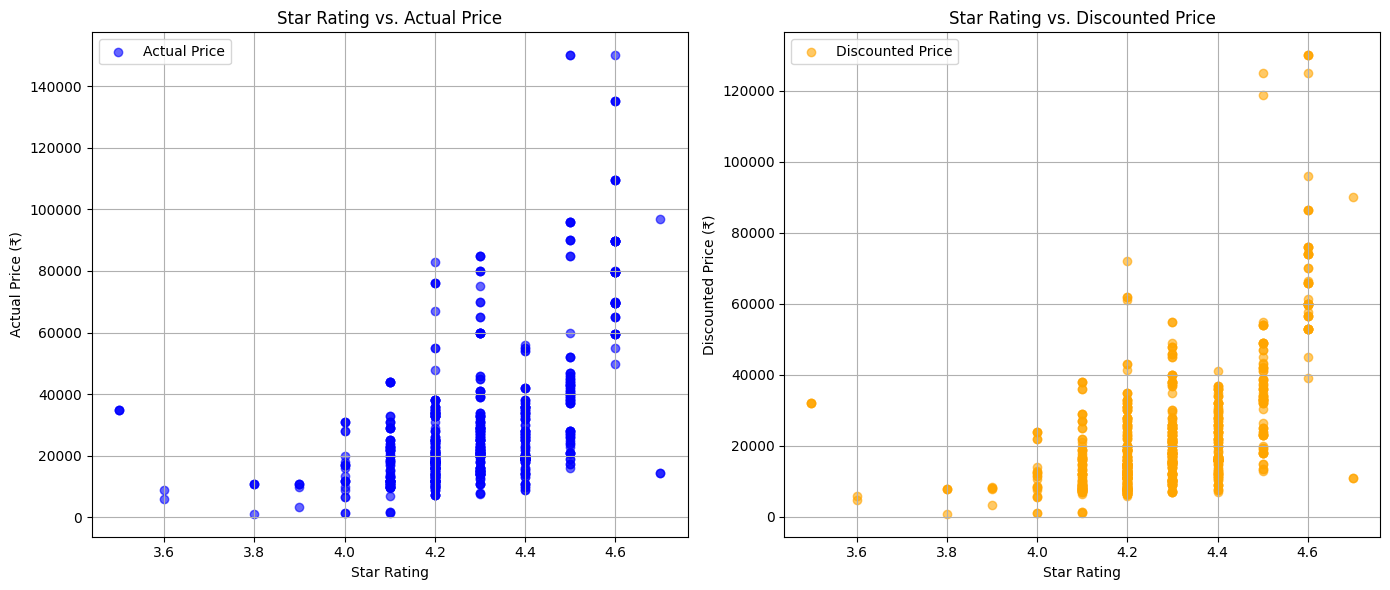

In [32]:
plt.figure(figsize=(14, 6))

# Plotting Actual Price
plt.subplot(1, 2, 1)
plt.scatter(df['Stars'], df['Actual price'], color='blue', alpha=0.6, label='Actual Price')
plt.title('Star Rating vs. Actual Price')
plt.xlabel('Star Rating')
plt.ylabel('Actual Price (₹)')
plt.grid()
plt.legend()

# Plotting Discounted Price
plt.subplot(1, 2, 2)
plt.scatter(df['Stars'], df['Discount price'], color='orange', alpha=0.6, label='Discounted Price')
plt.title('Star Rating vs. Discounted Price')
plt.xlabel('Star Rating')
plt.ylabel('Discounted Price (₹)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Insight**: The analysis shows a strong correlation between star ratings and both actual and discounted prices, indicating that consumers are willing to pay more for higher-rated products. This consistency suggests that even with discounts, well-rated items maintain their perceived value, allowing businesses to justify higher price points for quality offerings.

## Business Understanding

The analysis reveals that Realme leads in quantity due to effective marketing, while Apple and OnePlus excel in perceived quality with higher ratings. Consumer preferences favor 128 GB smartphones and larger displays, indicating a need for businesses to prioritize these features. The popularity of the 50MP + 2MP camera suggests a focus on quality camera specifications. Additionally, the strong correlation between star ratings and pricing highlights that consumers are willing to pay more for higher-rated products. Businesses should enhance quality, align features with consumer demand, and leverage marketing to maximize sales and customer satisfaction.